In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
sns.set()

In [20]:
df=pd.read_csv("HR_comma_sep.csv")
df.rename(columns={"satisfaction_level":"satisfaction","last_evaluation":"evaluation","promotion_last_5years":"promotion"},inplace=True)
print(df.dtypes)

satisfaction            float64
evaluation              float64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion                 int64
Department               object
salary                   object
dtype: object


In [21]:
print(df.isnull().sum())
print(df.isna().sum())

satisfaction            0
evaluation              0
number_project          0
average_montly_hours    0
time_spend_company      0
Work_accident           0
left                    0
promotion               0
Department              0
salary                  0
dtype: int64
satisfaction            0
evaluation              0
number_project          0
average_montly_hours    0
time_spend_company      0
Work_accident           0
left                    0
promotion               0
Department              0
salary                  0
dtype: int64


In [22]:
df.describe().transpose
# profile=df.profile_report()
# profile.to_file("profile.html")

<bound method DataFrame.transpose of        satisfaction    evaluation  number_project  average_montly_hours  \
count  14999.000000  14999.000000    14999.000000          14999.000000   
mean       0.612834      0.716102        3.803054            201.050337   
std        0.248631      0.171169        1.232592             49.943099   
min        0.090000      0.360000        2.000000             96.000000   
25%        0.440000      0.560000        3.000000            156.000000   
50%        0.640000      0.720000        4.000000            200.000000   
75%        0.820000      0.870000        5.000000            245.000000   
max        1.000000      1.000000        7.000000            310.000000   

       time_spend_company  Work_accident          left     promotion  
count        14999.000000   14999.000000  14999.000000  14999.000000  
mean             3.498233       0.144610      0.238083      0.021268  
std              1.460136       0.351719      0.425924      0.144281  
min

In [23]:
df.left.value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [24]:
df.groupby("left").agg([np.mean,np.std])

satisfaction           evaluation           number_project            \
             mean       std       mean       std           mean       std   
left                                                                        
0        0.666810  0.217104   0.715473  0.162005       3.786664  0.979884   
1        0.440098  0.263933   0.718113  0.197673       3.855503  1.818165   

     average_montly_hours            time_spend_company            \
                     mean        std               mean       std   
left                                                                
0              199.060203  45.682731           3.380032  1.562348   
1              207.419210  61.202825           3.876505  0.977698   

     Work_accident           promotion            
              mean       std      mean       std  
left                                              
0         0.175009  0.379991  0.026251  0.159889  
1         0.047326  0.212364  0.005321  0.072759

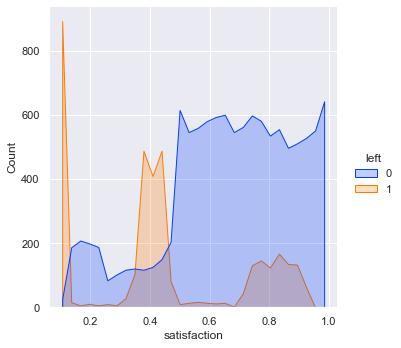

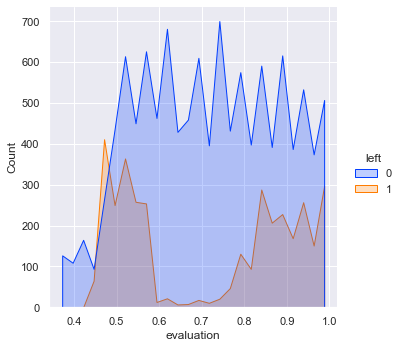

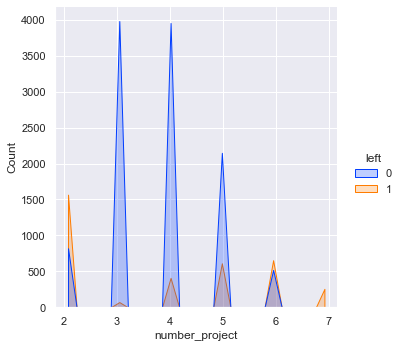

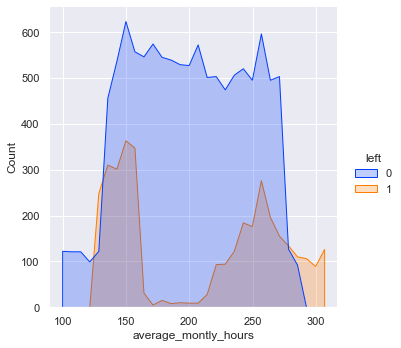

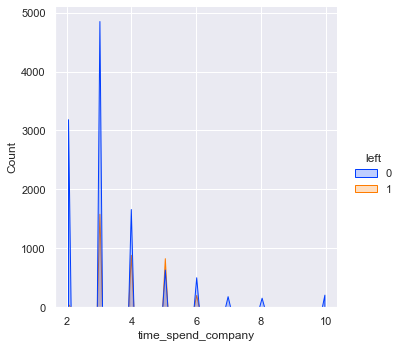

In [25]:
j=0
for i in df.columns:
    if j<5:
     sns.displot(data=df,x=i,element="poly",hue="left",palette="bright")
    j=j+1

<Figure size 1440x360 with 0 Axes>

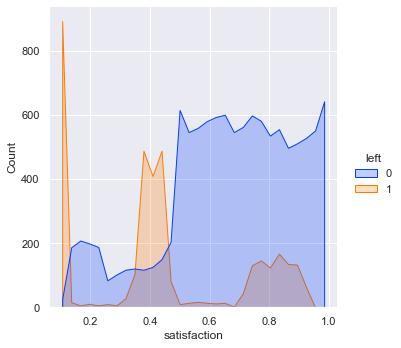

In [26]:
plt.figure(figsize=(20,5))
sns.displot(data=df,x="satisfaction",hue="left",palette="bright",element="poly")

satisfaction             0.510435
evaluation              -0.150037
number_project          -2.357563
average_montly_hours   -74.094878
time_spend_company      -0.585375
Work_accident            0.095105
left                    -0.761917
promotion                0.017968
dtype: float64
satisfaction             0.54
evaluation              -0.15
number_project          -2.00
average_montly_hours   -78.00
time_spend_company      -1.00
Work_accident            0.00
left                    -1.00
promotion                0.00
dtype: float64


<AxesSubplot:xlabel='salary', ylabel='count'>

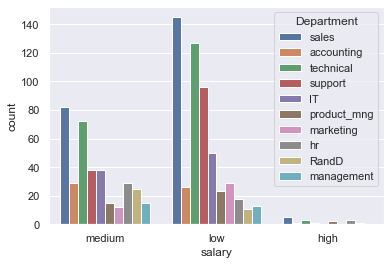

In [27]:
#why employees are dissatisfied which causes them to leave(mean evaluation = 0.886)

df_t1=df.loc[(df.satisfaction<0.17)&(df.left==1)]
print(df.mean()-df_t1.mean())
print(df.median()-df_t1.median())
sns.countplot(data=df_t1,x="salary",hue="Department")

#they are "hard working" but leaving because more number of project- monthly hours - have spend more time in company
#- low to medium salary (sales and technical department)
#they are of great value

satisfaction             0.203838
evaluation               0.195849
number_project           1.716509
average_montly_hours    54.145093
time_spend_company       0.462857
Work_accident            0.097863
left                    -0.761917
promotion                0.013688
dtype: float64
satisfaction             0.23
evaluation               0.21
number_project           2.00
average_montly_hours    55.00
time_spend_company       0.00
Work_accident            0.00
left                    -1.00
promotion                0.00
dtype: float64


<AxesSubplot:xlabel='salary', ylabel='count'>

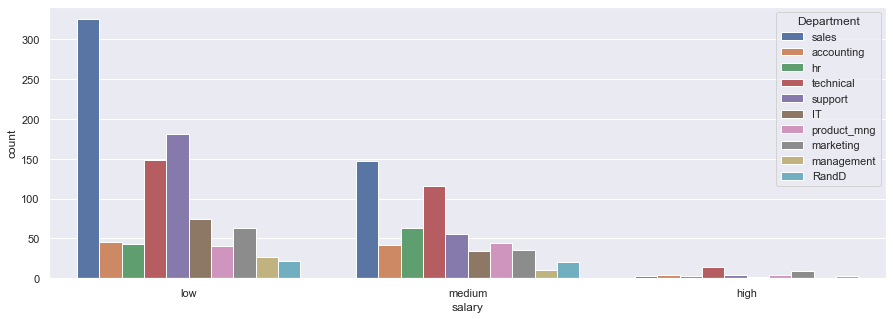

In [28]:
#why avg. satisfied people are leaving(evaluation= 0.52)

df_t2=df.loc[(df.satisfaction>0.32)&(df.satisfaction<0.52)&(df.left==1)]
print(df.mean()-df_t2.mean())
print(df.median()-df_t2.median())
plt.figure(figsize=(15,5))
sns.countplot(data=df_t2,x="salary",hue="Department")

#we cant seem to figure out why they are leaving the only reason seem to be low salary "support technical sales" are
#main streams affected by low salary

satisfaction            -0.204993
evaluation              -0.193803
number_project          -0.727169
average_montly_hours   -41.813926
time_spend_company      -1.581300
Work_accident            0.095829
left                    -0.761917
promotion                0.017026
dtype: float64
satisfaction            -0.18
evaluation              -0.20
number_project          -1.00
average_montly_hours   -45.00
time_spend_company      -2.00
Work_accident            0.00
left                    -1.00
promotion                0.00
dtype: float64


<AxesSubplot:xlabel='salary', ylabel='count'>

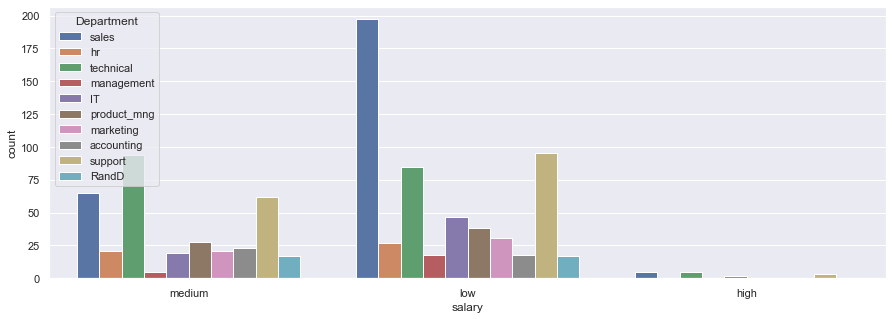

In [29]:
#why satisfied are leaving(evaluation=0.9) great importance

df_t3=df.loc[(df.satisfaction>0.68)&(df.left==1)]
print(df.mean()-df_t3.mean())
print(df.median()-df_t3.median())
plt.figure(figsize=(15,5))
sns.countplot(data=df_t3,x="salary",hue="Department")

#again the most affected department are sales technical and support "low to medium slary" - extra wrok hours - no promotion
# - extra project

In [30]:
department_list=df['Department'].value_counts()
ret_ratio=df.groupby('Department')["left"].value_counts()
left_arr=np.zeros(len(department_list))
i=0
for k,v in department_list.iteritems():
    left_arr[i]=100*ret_ratio[k][1]/v
    i=i+1
left_arr

array([24.49275362, 25.625     , 24.89905787, 22.24938875, 21.95121951,
       23.65967366, 15.37484117, 26.59713168, 29.09336942, 14.44444444])

In [31]:
salary_count=df.salary.value_counts()
salary_left=df.groupby("salary")["left"].value_counts()
salary_arr=np.zeros(len(salary_count))
i=0
for x,y in salary_count.iteritems():
    salary_arr[i]=100*salary_left[x][1]/y
    i=i+1

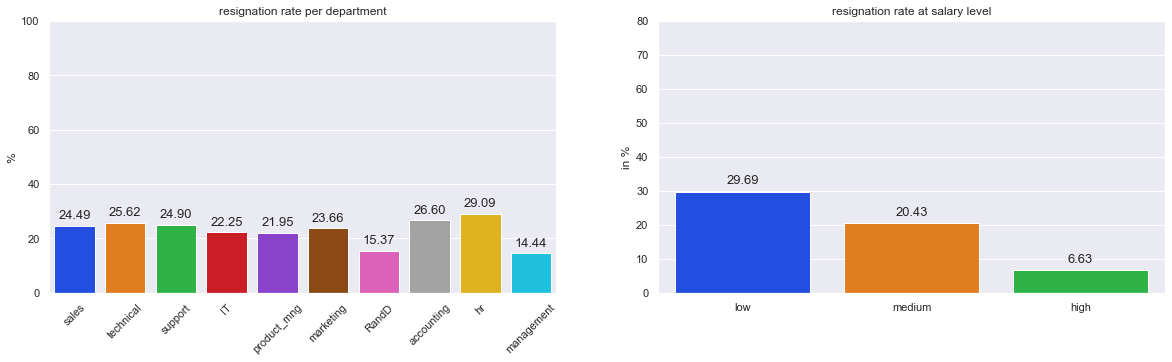

In [32]:
fig,ax=plt.subplots(ncols=2,figsize=(20,5))
plt.sca(ax[0])
barplot=sns.barplot(x=department_list.keys(),y=left_arr,palette="bright")
plt.xticks(rotation=45)
plt.ylim(0,100)
plt.ylabel("%")
plt.title("resignation rate per department")
for bar in barplot.patches:
    plt.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=13, xytext=(0,10), 
                   textcoords='offset points') 

plt.sca(ax[1])
barplot2=sns.barplot(x=salary_count.keys(),y=salary_arr,palette="bright")
plt.ylim(0,80)
plt.ylabel("in %")
plt.title("resignation rate at salary level")
for bar in barplot2.patches:
    plt.annotate(format(bar.get_height(),".2f"),
                 (bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center', 
                   size=13, xytext=(0,8), 
                   textcoords='offset points')

<AxesSubplot:>

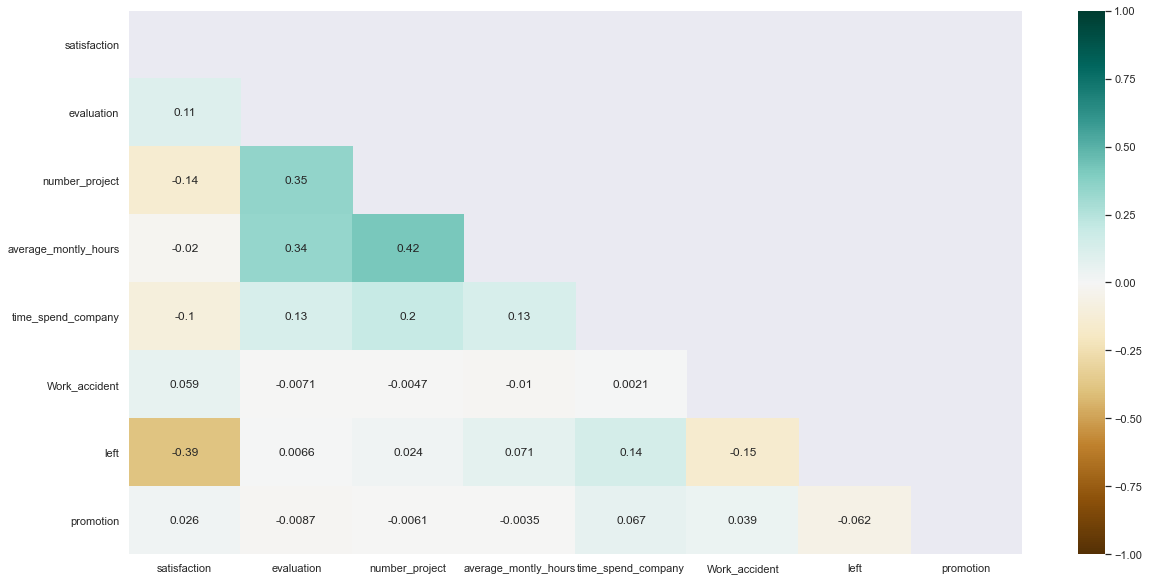

In [33]:
plt.figure(figsize=(20,10))
mask=np.triu(df.corr())
sns.heatmap(df.corr(),cmap="BrBG",mask=mask,annot=True,vmax=1,vmin=-1)

In [ ]:
sns.pairplot(df,hue="left")

In [ ]:
cor=df.corr()
sns.heatmap(cor[["left"]].sort_values(by="left",ascending=False),vmin=-1,vmax=1,annot=True,cmap="BrBG")